In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/software_current/week2')

import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

from helper3 import *
# helper3는 fit_window에서 window height의 값을 150으로 키움 이 값이 작을수록 학습이 제대로 진행 X 커야 차선을 명확히 인식하는 것을 볼 수 있음  
try:
    os.makedirs('ATS_data2')
except:
    pass

In [ ]:
# !unzip ATS_data2.zip -d ./ATS_data2

In [3]:
def Radius(fit):
    df = 2*fit[0]*900 + fit[1]
    ddf = 2*fit[0]

    R = (1+(df)**2)**1.5/(ddf)

    return R

def Write(string, img, line=1):
    img = img.copy()
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    position = (10,40 + 50*line)
    fontScale              = 2
    fontColor              = (255,255,255)
    lineType               = 2

    cv2.putText(img, string, 
        position, 
        font, 
        fontScale,
        fontColor,
        lineType)
    return img


In [6]:
datas = FindLane('ATS_data2', range(400,600, 10), show=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# datas = FindLane('ATS_data2', range(1419))
# laneDf = pd.DataFrame(datas, columns = ['curvatL', 'curvatR', 'deviation'])
# laneDf.to_csv('lane.csv', index=False)

In [ ]:
laneDf = pd.read_csv('lane.csv')

In [ ]:
logDf = pd.read_csv('drive_log.csv')

In [ ]:
laneDf

,curvatL,curvatR,deviation
0,0.046340,0.401375,1.108720
1,0.046405,0.398800,1.108321
2,-0.035229,0.553383,1.108947
3,0.083064,0.583583,1.109553
4,0.082409,0.584244,1.109474
...,...,...,...
1414,-1.169327,3.943371,-1.002839
1415,-0.365909,0.026039,-1.065265
1416,0.299424,2.546449,-1.063294
1417,0.876689,4.126496,1.096320


In [ ]:
logDf

,steer,speed,throttle,brake
0,0.000000,-0.010015,0.000000,1.0
1,0.000000,-0.005614,0.000000,1.0
2,0.000000,-0.001974,0.000000,1.0
3,-0.003015,62.744854,1.000000,0.0
4,0.001918,87.873055,1.000000,0.0
...,...,...,...,...
1414,-0.010717,56.001244,1.000000,0.0
1415,0.000026,84.230990,0.786713,0.0
1416,0.000022,84.243690,0.859255,0.0
1417,0.000019,84.322556,0.704246,0.0


In [ ]:
df = pd.concat([logDf, laneDf], axis=1)
df.head()

,steer,speed,throttle,brake,curvatL,curvatR,deviation
0,0.000000,-0.010015,0.0,1.0,0.046340,0.401375,1.108720
1,0.000000,-0.005614,0.0,1.0,0.046405,0.398800,1.108321
2,0.000000,-0.001974,0.0,1.0,-0.035229,0.553383,1.108947
3,-0.003015,62.744854,1.0,0.0,0.083064,0.583583,1.109553
4,0.001918,87.873055,1.0,0.0,0.082409,0.584244,1.109474


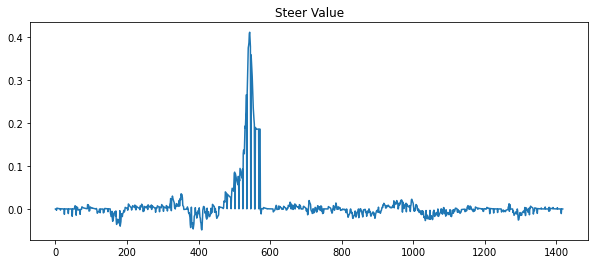

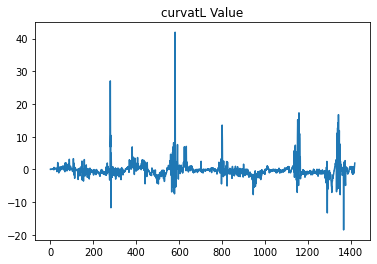

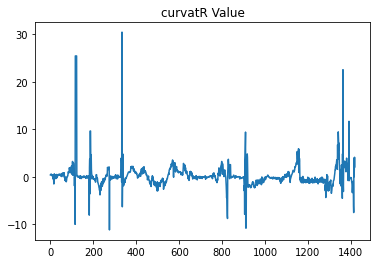

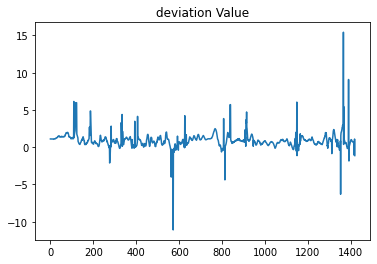

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.steer)
plt.title("Steer Value")
plt.show()
plt.plot(df.curvatL)
plt.title("curvatL Value")
plt.show()
plt.plot(df.curvatR)
plt.title("curvatR Value")
plt.show()
plt.plot(df.deviation)
plt.title("deviation Value")
plt.show()

In [ ]:
def Smooth(array, size=5):
    mini = 0
    maxi = len(array)-1

    new_array = np.zeros(maxi+1)
    for i in range(maxi+1):
        new_array[i] = np.mean(array[max(i-size, mini):min(i+size, maxi)])
    return new_array

0.00776895841540552
0.03825086457367151


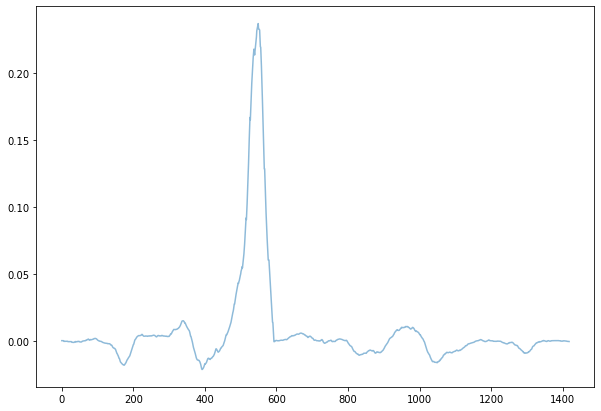

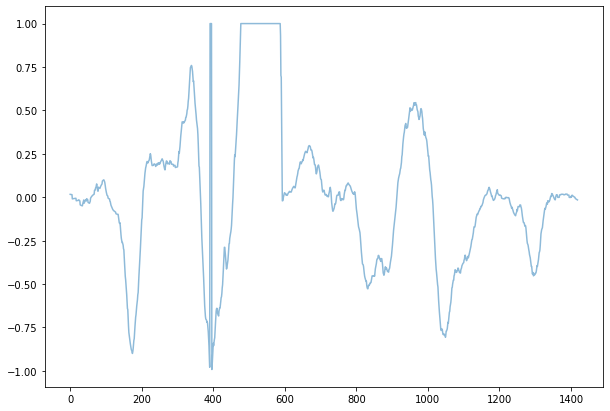

In [ ]:
smoothSteer = Smooth(df.steer, size=20)
print(smoothSteer.mean())
print(smoothSteer.std())
plt.figure(figsize=(10,7))
plt.plot(smoothSteer, alpha=0.5)
smoothSteer[np.abs(smoothSteer) > 0.02] = 0.02
plt.figure(figsize=(10,7))
plt.plot(smoothSteer*50, alpha=0.5)

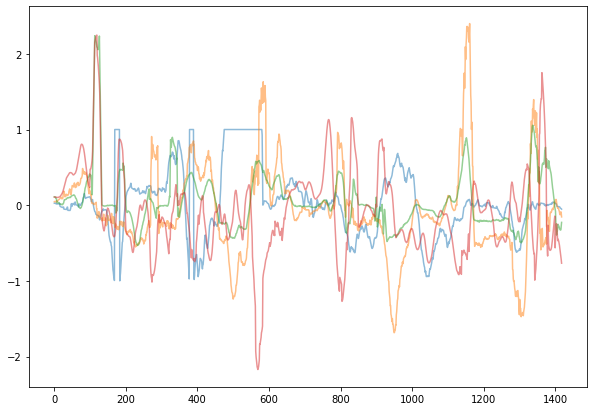

In [ ]:
smoothSteer = Smooth(df.steer, size=10)
smoothSteer[np.abs(smoothSteer) > 0.02] = 0.02
plt.figure(figsize=(10,7))
plt.plot(smoothSteer*50, alpha=0.5)

smoothL = Smooth(df.curvatL, size=10)
plt.plot(smoothL/2, alpha=0.5)

smoothR = Smooth(df.curvatR, size=10)
plt.plot(smoothR/4, alpha=0.5)

smoothD = Smooth(df.deviation, size=10)
plt.plot(smoothD-1, alpha=0.5)
plt.show()

In [ ]:
df.corr()

,steer,speed,throttle,brake,curvatL,curvatR,deviation
steer,1.000000,-0.486848,-0.087129,0.286331,-0.046668,-0.030668,-0.061763
speed,-0.486848,1.000000,0.254594,-0.388850,-0.006046,0.032885,0.076118
throttle,-0.087129,0.254594,1.000000,-0.183401,0.048948,0.003959,-0.015560
brake,0.286331,-0.388850,-0.183401,1.000000,0.012573,0.059438,-0.184430
curvatL,-0.046668,-0.006046,0.048948,0.012573,1.000000,0.184939,-0.003321
curvatR,-0.030668,0.032885,0.003959,0.059438,0.184939,1.000000,0.173022
deviation,-0.061763,0.076118,-0.015560,-0.184430,-0.003321,0.173022,1.000000


In [ ]:
df.steer.mean()

0.0077676793016378445

In [ ]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# elu Model

steer 변수가 우리에겐 매우 맞추고자 하는 값

steer 변수의 값을 잘 맞추기 위해 변환 작업 먼저 실시 smooth 먼저 진행 -> 정규화를 통해 작업 실시 



In [ ]:
YX = df.values
for i in range(7):
    YX[:,i] = Smooth(YX[:,i], size=10)
    mean = np.mean(YX[:,i])
    std = np.std(YX[:,i])

    YX[:,i] -= mean
    YX[:,i] /= std
    YX[:,i][YX[:,i] < -2] = -2
    YX[:,i][YX[:,i] > 2] = 2

Y = YX[:,0]
X = YX[:,1:]

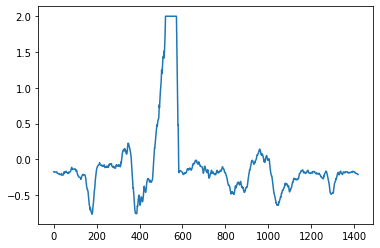

In [ ]:
plt.plot(Y)

steer의 최댓값 2 / 최솟값 -2로 변환 작업 진행

In [ ]:
dataX = Input(shape=(6,))
hidden = Dense(128, activation='elu')(dataX)
hidden = Dense(256, activation='elu')(hidden)
hidden = Dense(512, activation='elu')(hidden)
hidden = Dense(128, activation='elu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

model = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
model.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
tf_op_layer_Mul (TensorFlowO [(None, 1)]              

In [ ]:
shuffle = np.arange(len(Y))
np.random.shuffle(shuffle)
trLog = model.fit(x=X[shuffle], y=Y[shuffle], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 8ms/step - loss: 0.4430 - root_mean_squared_error: 0.6656 - val_loss: 0.1263 - val_root_mean_squared_error: 0.3554
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1442 - root_mean_squared_error: 0.3797 - val_loss: 0.0948 - val_root_mean_squared_error: 0.3078
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0963 - root_mean_squared_error: 0.3103 - val_loss: 0.0748 - val_root_mean_squared_error: 0.2734
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1142 - root_mean_squared_error: 0.3380 - val_loss: 0.0817 - val_root_mean_squared_error: 0.2858
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0995 - root_mean_squared_error: 0.3154 - val_loss: 0.0870 - val_root_mean_squared_error: 0.2949
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1059 - root_mean_squared_error: 0.3254 - val_loss: 0.0966 - val_root_m

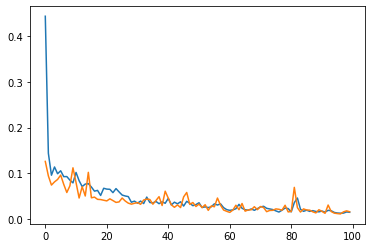

In [ ]:
plt.plot(trLog.history['loss'], label='train')
plt.plot(trLog.history['val_loss'], label= 'validation')

학습이 적절히 잘 되는 모습을 볼 수 있음 이때 valid set의 최저 loss 값을 찾아보자

In [ ]:
min(trLog.history['val_loss'])

0.011846312321722507

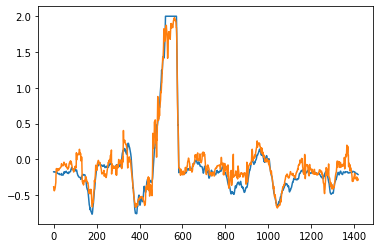

In [ ]:
pred = model(X)
pred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(pred)

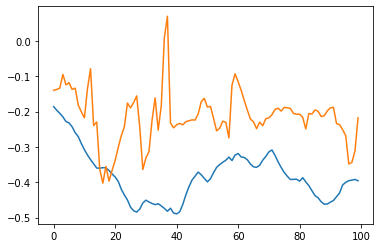

In [ ]:
plt.plot(Y[800:900])
plt.plot(pred[800:900])

Shuffle을 진행한 결과 어느정도 잘 맞추는 모습을 볼 수 있음

In [ ]:
dataX = Input(shape=(6,))
hidden = Dense(128, activation='elu')(dataX)
hidden = Dense(256, activation='elu')(hidden)
hidden = Dense(512, activation='elu')(hidden)
# hidden = Dense(128, activation='elu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

model = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
model.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
_________________________________________________________________
tf_op_layer_Mul_1 (TensorFlo [(None, 1)]               0         
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
________________________________________________

In [ ]:
trLog = model.fit(x=X[shuffle], y=Y[shuffle], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 10ms/step - loss: 0.2537 - root_mean_squared_error: 0.5036 - val_loss: 0.1920 - val_root_mean_squared_error: 0.4382
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1830 - root_mean_squared_error: 0.4277 - val_loss: 0.1095 - val_root_mean_squared_error: 0.3309
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1359 - root_mean_squared_error: 0.3686 - val_loss: 0.0868 - val_root_mean_squared_error: 0.2946
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1314 - root_mean_squared_error: 0.3625 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3657
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1268 - root_mean_squared_error: 0.3561 - val_loss: 0.1000 - val_root_mean_squared_error: 0.3163
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1117 - root_mean_squared_error: 0.3342 - val_loss: 0.1097 - val_root_

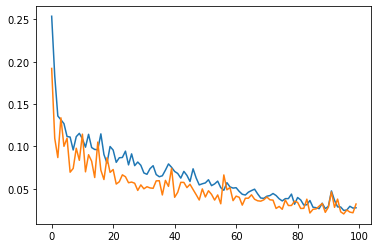

In [ ]:
plt.plot(trLog.history['loss'], label='train')
plt.plot(trLog.history['val_loss'], label= 'validation')

In [ ]:
min(trLog.history['val_loss'])

0.02022002823650837

Loss값이 상대적으로 더 크다.. 즉 Layer를 줄이는것은 별로 좋지 않은것 같다.

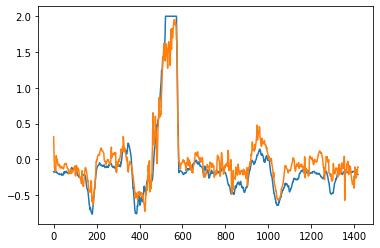

In [ ]:
pred = model(X)
pred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(pred)

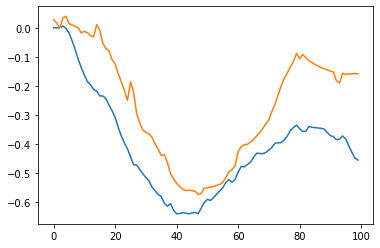

In [ ]:
plt.plot(Y[1000:1100])
plt.plot(pred[1000:1100])

## Layer 추가

In [ ]:
dataX = Input(shape=(6,))
hidden = Dense(128, activation='elu')(dataX)
hidden = Dense(256, activation='elu')(hidden)
hidden = Dense(512, activation='elu')(hidden)
hidden = Dense(128, activation='elu')(hidden)
hidden = Dense(32, activation='elu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

model = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
model.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [ ]:
trLog = model.fit(x=X[shuffle], y=Y[shuffle], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 8ms/step - loss: 0.4462 - root_mean_squared_error: 0.6679 - val_loss: 0.1102 - val_root_mean_squared_error: 0.3319
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1040 - root_mean_squared_error: 0.3226 - val_loss: 0.0838 - val_root_mean_squared_error: 0.2894
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0854 - root_mean_squared_error: 0.2922 - val_loss: 0.0728 - val_root_mean_squared_error: 0.2699
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0931 - root_mean_squared_error: 0.3051 - val_loss: 0.0797 - val_root_mean_squared_error: 0.2823
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0760 - root_mean_squared_error: 0.2757 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2201
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0702 - root_mean_squared_error: 0.2650 - val_loss: 0.0537 - val_root_m

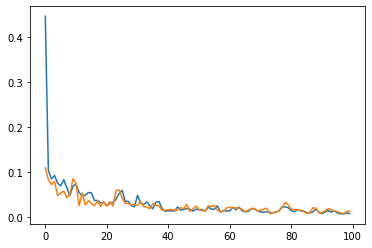

In [ ]:
plt.plot(trLog.history['loss'], label='train')
plt.plot(trLog.history['val_loss'], label= 'validation')

In [ ]:
min(trLog.history['val_loss'])

0.008173206821084023

Layer를 추가한 결과 Loss가 더 잘 잡힌것을 볼 수 있으며 실제값과 예측값이 더 비슷한 것을 볼 수 있다.

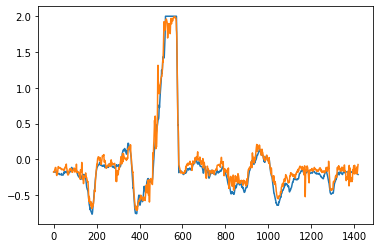

In [ ]:
pred = model(X)
pred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(pred)

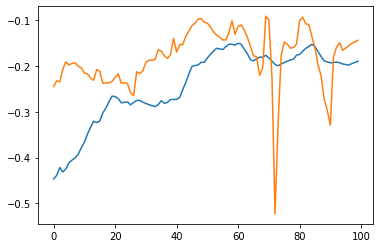

In [ ]:
plt.plot(Y[1100:1200])
plt.plot(pred[1100:1200])

대체로 가장 좋은 모습을 보여주지만 급격하게 발생하는 문제가 발생한다.

## Feature 추가

In [ ]:
window = 10
winX = np.zeros((len(Y), 6*window))
for i in range(window):
    winX[:,i*6:(i+1)*6] = np.roll(X, i, axis=0)

Cosine 취한 값, Sine 취한값 Feature 추가

In [ ]:
winX = np.concatenate([winX,np.cos(X)],axis=1)
winX = np.concatenate([winX,np.sin(X)],axis=1)
winX.shape

(1419, 72)

In [ ]:
import seaborn as sns

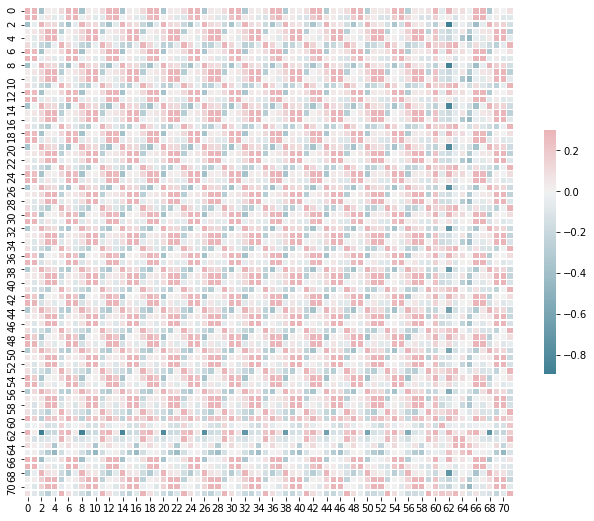

In [ ]:
corr = pd.DataFrame(winX).corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
dataX = Input(shape=(winX.shape[1],))
hidden = Dense(128, activation='relu')(dataX)
hidden = Dense(256, activation='relu')(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(128, activation='relu')(hidden)
hidden = Dense(32, activation='elu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

winModel = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
winModel.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())

In [ ]:
winLog = winModel.fit(x=winX[shuffle], y=Y[shuffle], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 8ms/step - loss: 0.1868 - root_mean_squared_error: 0.4323 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0278 - root_mean_squared_error: 0.1667 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1649
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0171 - root_mean_squared_error: 0.1307 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0985
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0071 - root_mean_squared_error: 0.0844 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0073 - root_mean_squared_error: 0.0856 - val_loss: 0.0062 - val_root_m

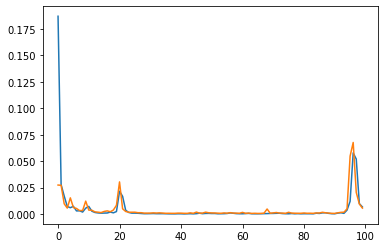

In [ ]:
plt.plot(winLog.history['loss'], label='train')
plt.plot(winLog.history['val_loss'], label= 'validation')

In [ ]:
min(winLog.history['val_loss'])

0.0006070143426768482

Loss값이 굉장히 작아졌다.

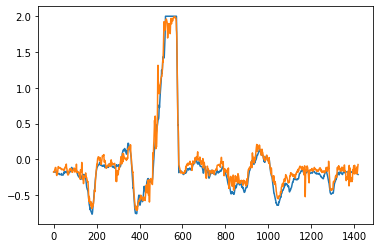

In [ ]:
winPred = winModel(winX)
winPred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(winPred)

가장 잘 맞추는 모습을 보여준다. 이대로 진행하는 것이 좋아 보인다. 









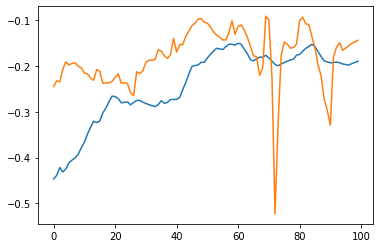

In [ ]:
plt.plot(Y[1100:1200])
plt.plot(winPred[1100:1200])

가장 많은 차이가 나는 부분을 보면 다음과 같다.

항상 문제가 발생하는 1160~1180 번째 사이를 보고자 한다.

In [ ]:
FindLane('ATS_data2',range(1160,1180), show=True)

Output hidden; open in https://colab.research.google.com to view.

찾아본 결과 왼쪽 차선을 잘 못찾는 문제가 발생한다. 

height를 높여 잘 맞추었지만 가끔 발생하는 문제에 대한 해결책이 필요할 것이라 생각한다.

In [ ]:
dataX = Input(shape=(winX.shape[1],))
hidden = Dense(128, activation='elu')(dataX)
hidden = Dense(256, activation='elu')(hidden)
hidden = Dense(512, activation='elu')(hidden)
hidden = Dense(128, activation='elu')(hidden)
hidden = Dense(32, activation='elu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

winModel = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
winModel.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())

In [ ]:
winLog = winModel.fit(x=winX[shuffle], y=Y[shuffle], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 8ms/step - loss: 0.9327 - root_mean_squared_error: 0.9658 - val_loss: 0.1283 - val_root_mean_squared_error: 0.3582
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0643 - root_mean_squared_error: 0.2535 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0415 - root_mean_squared_error: 0.2038 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1692
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0412 - root_mean_squared_error: 0.2029 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1605
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0271 - root_mean_squared_error: 0.1645 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1848
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0237 - root_mean_squared_error: 0.1538 - val_loss: 0.0183 - val_root_m

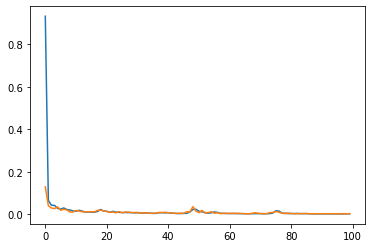

In [ ]:
plt.plot(winLog.history['loss'], label='train')
plt.plot(winLog.history['val_loss'], label= 'validation')

In [ ]:
min(winLog.history['val_loss'])

0.0012172159040346742

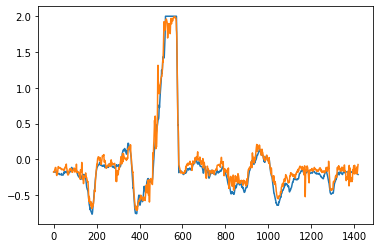

In [ ]:
winPred = winModel(winX)
winPred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(winPred)

가장 잘 맞추는 모습을 보여준다. 이대로 진행하는 것이 좋아 보인다. 









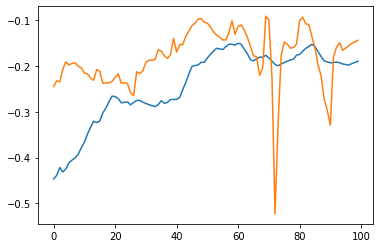

In [ ]:
plt.plot(Y[1100:1200])
plt.plot(winPred[1100:1200])

In [ ]:
dataX = Input(shape=(winX.shape[1],))
hidden = Dense(128, activation='elu')(dataX)
hidden = Dense(256, activation='elu')(hidden)
hidden = Dense(512, activation='elu')(hidden)
hidden = Dense(128, activation='elu')(hidden)
hidden = Dense(32, activation='elu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

winModel = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.RMSprop()
winModel.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())

In [ ]:
winLog = winModel.fit(x=winX[shuffle], y=Y[shuffle], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 9ms/step - loss: 1.2318 - root_mean_squared_error: 1.1099 - val_loss: 0.2013 - val_root_mean_squared_error: 0.4486
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.2287 - root_mean_squared_error: 0.4783 - val_loss: 0.2227 - val_root_mean_squared_error: 0.4719
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1468 - root_mean_squared_error: 0.3831 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2201
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1112 - root_mean_squared_error: 0.3335 - val_loss: 0.2465 - val_root_mean_squared_error: 0.4964
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.1107 - root_mean_squared_error: 0.3327 - val_loss: 0.0784 - val_root_mean_squared_error: 0.2800
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0970 - root_mean_squared_error: 0.3114 - val_loss: 0.0625 - val_root_m

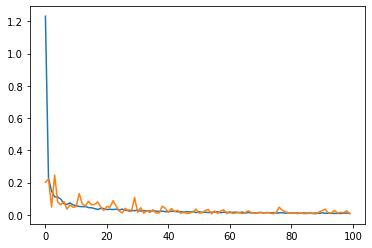

In [ ]:
plt.plot(winLog.history['loss'], label='train')
plt.plot(winLog.history['val_loss'], label= 'validation')

In [ ]:
min(winLog.history['val_loss'])

0.0055595943704247475

Loss값이 굉장히 작아졌다.

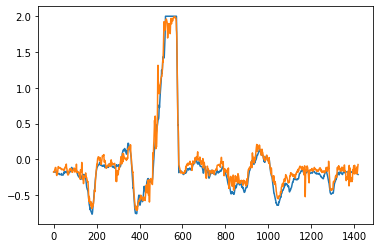

In [ ]:
winPred = winModel(winX)
winPred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(winPred)

가장 잘 맞추는 모습을 보여준다. 이대로 진행하는 것이 좋아 보인다. 









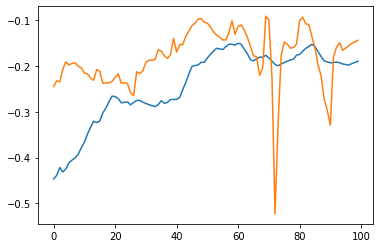

In [ ]:
plt.plot(Y[1100:1200])
plt.plot(winPred[1100:1200])

최종 모델로 선택해도 괜찮을것 같다.